In [35]:
'''
The link to the OG doc for LDA: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/discriminant_analysis.py
'''

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()



,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']].values
y = df['class label'].values



enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
print(X[0],len(y),y)
%matplotlib inline

[ 5.1  3.5  1.4  0.2] 150 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=3)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
print(np.shape(X_lda_sklearn))


(150, 2)


In [18]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda_sklearn[:,0].real[y == label],
                y=X_lda_sklearn[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()



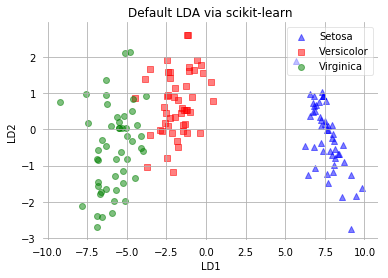

In [20]:

plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [1]:




import pandas as pd
from matplotlib import pyplot as plt

feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''
run='fg3_m_12'

#LDA_img_ratio_fg3_m12_early_late_all.txt
myr=5,200,180,185,190,195,205,210,220,225,230,240,250,260
df2 = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all.txt',#was '_view_all.txt'
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
#df=df.loc[df['Myr'] == 5 or df['Myr'] == 225]
#df=df.loc[df['Myr'].isin([5,200,myr])]
df2.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
df2.dropna(how="all", inplace=True) # to drop the empty line at file-end

list_kins=['NONSCATTER_MILESHC_corrected','SCATTER_MILESHC_corrected','SCATTER','NONSCATTER']

for i in range(len(list_kins)):
   
    add_on=list_kins[i]
    print('run', add_on)




    feature_dict = {i:label for i,label in zip(
                    range(9),
                      ('Counter',
                       'Myr',
                      'Viewpoint',
                      'Delta PA',
                      'v_asym',
                      's_asym',
                      'K_tot',
                      'resids',
                      'i'))}

    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='PCA_kin_'+str(add_on)+'.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    #df=df.loc[df['Myr'] == 5 or df['Myr'] == 225]
    #df=df.loc[df['Myr'].isin([5,200,myr])]
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['fiber']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end



    merged = pd.merge(left=df2,right=df, on=['Myr','Viewpoint'])
    if i==4:
        print(merged)

    from sklearn.preprocessing import LabelEncoder


    X = merged[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry',
       'v_asym','s_asym']].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    n_params=9


    y = merged['class label'].values


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.8,0.2])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
    
    print(dec)#mean accuracy on the given test data and labels.
    print(coef)
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.8,0.2])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"])
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"])

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    plt.show()
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



EmptyDataError: No columns to parse from file

In [13]:
import math
NONSCATTER=[-0.69609521, -0.0078832,   4.41491687,  6.15332374, -3.04132293,  0.66753479,
   0.68833139, -0.35440716,  0.80938349]
#A,C,S,sigma,G,A_S,n,vel,M20
#1/10th
SCATTER=[ -7.46634884e-01,   2.65348228e-03 ,  4.05597665e+00 ,  6.91605057e+00,
   -3.65245610e+00 ,  6.83815770e-01 ,  7.85409412e-01,  -7.69581706e-01,
   -5.19556937e-02]
#A,C,S,A_S,vel,Gini,n,sigma,M20
#1/10th
SCATTER_MILESHC_corrected=[-0.81003349, -0.05767831 , 4.0528699  , 6.7326127,  -3.51244676,  0.93881014,
   0.72658846, -1.10888531,  0.27643255]
#A,C,S,vel,n,G,A_S,sigma,M20
#OOM
NONSCATTER_MILESHC_corrected=[-1.08988571,  0.02130446,  4.17536727,  6.55635034, -3.41241524,  1.34479293,
   0.55429217, -1.72265744 , 0.74637557]
#A,C,S,vel,n,Gini,sigma,A_S,M20
#OOM




list_names=[SCATTER,NONSCATTER,NONSCATTER_MILESHC_corrected,SCATTER_MILESHC_corrected]
act_names=['SCATTER','NONSCATTER','NONSCATTER_MILESHC_corrected','SCATTER_MILESHC_corrected']



        
for x in range(len(list_names)):
    for y in range(len(list_names)):
        try:
            exp=math.degrees(math.acos(np.dot(list_names[x],list_names[y])/(np.linalg.norm(list_names[x])*np.linalg.norm(list_names[y]))))
        except ValueError:
            print('Domain error', act_names[x], 'vs', act_names[y])
        if exp <90:
            expnow=exp
        else:
            expnow=abs(180-exp)
        print(act_names[x], 'vs', act_names[y], expnow)

SCATTER -0.746634884
NONSCATTER -0.69609521
NONSCATTER_MILESHC_corrected -1.08988571
SCATTER_MILESHC_corrected -0.81003349
SCATTER 0.00265348228
NONSCATTER -0.0078832
NONSCATTER_MILESHC_corrected 0.02130446
SCATTER_MILESHC_corrected -0.05767831
SCATTER 4.05597665
NONSCATTER 4.41491687
NONSCATTER_MILESHC_corrected 4.17536727
SCATTER_MILESHC_corrected 4.0528699
SCATTER 6.91605057
NONSCATTER 6.15332374
NONSCATTER_MILESHC_corrected 6.55635034
SCATTER_MILESHC_corrected 6.7326127
SCATTER -3.6524561
NONSCATTER -3.04132293
NONSCATTER_MILESHC_corrected -3.41241524
SCATTER_MILESHC_corrected -3.51244676
SCATTER 0.68381577
NONSCATTER 0.66753479
NONSCATTER_MILESHC_corrected 1.34479293
SCATTER_MILESHC_corrected 0.93881014
SCATTER 0.785409412
NONSCATTER 0.68833139
NONSCATTER_MILESHC_corrected 0.55429217
SCATTER_MILESHC_corrected 0.72658846
SCATTER -0.769581706
NONSCATTER -0.35440716
NONSCATTER_MILESHC_corrected -1.72265744
SCATTER_MILESHC_corrected -1.10888531
SCATTER -0.0519556937
NONSCATTER 0.80938

In [ ]:
'''
~~~
Now just for the imaging part of it!
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]

#list_runs=['fg3_m1_10']
#priors_list=[[0.7,0.3]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    '''index_list=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0:
            index_list.append(j)
            
    df.drop(df.index[index_list], inplace=True)'''
    
    
    
    '''for j in range(len(df)):
        if add_on=='fg3_m15' or add_on=='fg3_m15_comp_real':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0)
        else:
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0)'''
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    y = df['class label'].values
    
    
    if add_noise=='yes':
        '''
        gini mean and std 0.5550252680173879 0.044777018337496165
        m20 mean and std -1.9712343829804506 0.37871210199946886
        C mean and std 3.5465035077152782 0.4881519277500404
        A mean and std 0.09206940323506102 0.053844924631844704
        A_S mean and std 0.131905632525 0.12206728280147515
        n mean and std 1.7474 1.65464914861127
        '''
        noise_vec=np.array([0.045,0.379,0.488,0.054,1.655,0.122])
        add=np.zeros((len(df), len(noise_vec)))
        for j in range(len(df)):
            
            for k in range(len(noise_vec)):
                if df[['class label']].values[j]==0:
                    s = np.random.normal(0, noise_vec[k], 1)
                    add[j,k]=s
                else:
                    s = np.random.normal(0, 0, 1)
                    add[j,k]=s
        X= df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values+add
    
    else:
        X= df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    
    
    '''Now I will make the actual plots of predictor space'''
    
    
    
    
    
    gini_non = []
    m20_non = []

    C_non = []
    A_non = []
    

    n_non = []
    A_S_non = []
    
    gini = []
    m20 = []

    C = []
    A = []
    

    n = []
    A_S = []
    




    for l in range(len(df)):
        if df[['class label']].values[l]==0:
        
            gini_non.append(X[l,0])
            m20_non.append(X[l,1])
            C_non.append(X[l,2])
            A_non.append(X[l,3])
            
            A_S_non.append(X[l,5])
            n_non.append(X[l,4])
        else:
            gini.append(X[l,0])
            m20.append(X[l,1])
            C.append(X[l,2])
            A.append(X[l,3])
            
            A_S.append(X[l,5])
            n.append(X[l,4])
            
        #print('concentration here', df[['Concentration (C)']].values[i][0])
        
    gini = {key:[] for key in myr}
    m20 = {key:[] for key in myr}
    
    gini_std = {key:[] for key in myr}
    m20_std = {key:[] for key in myr}

    C = {key:[] for key in myr}
    A = {key:[] for key in myr}
    S = {key:[] for key in myr}

    A_S = {key:[] for key in myr}
    n = {key:[] for key in myr}

    gini_non = {key:[] for key in myr_non}
    m20_non = {key:[] for key in myr_non}
    
    gini_non_std = {key:[] for key in myr_non}
    m20_non_std = {key:[] for key in myr_non}

    C_non = {key:[] for key in myr_non}
    A_non = {key:[] for key in myr_non}
    S_non = {key:[] for key in myr_non}

    n_non = {key:[] for key in myr_non}
    A_S_non = {key:[] for key in myr_non}


    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))

    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            gini_non[df[['Myr']].values[l][0]].append(X[l,0])
            m20_non[df[['Myr']].values[l][0]].append(X[l,1])
            gini_non_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            m20_non_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C_non[df[['Myr']].values[l][0]].append(X[l,2])
            A_non[df[['Myr']].values[l][0]].append(X[l,3])
            #S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
            A_S_non[df[['Myr']].values[l][0]].append(X[l,5])
            n_non[df[['Myr']].values[l][0]].append(X[l,4])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            gini[df[['Myr']].values[l][0]].append(X[l,0])
            m20[df[['Myr']].values[l][0]].append(X[l,1])
            gini_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            m20_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C[df[['Myr']].values[l][0]].append(X[l,2])
            A[df[['Myr']].values[l][0]].append(X[l,3])
            #S[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
            A_S[df[['Myr']].values[l][0]].append(X[l,5])
            n[df[['Myr']].values[l][0]].append(X[l,4])
    G_list_all_non=[]
    M20_list_all_non=[]
    G_list_all_non_std=[]
    M20_list_all_non_std=[]
    A_list_all_non=[]
    C_list_all_non=[]
    A_S_list_all_non=[]
    n_list_all_non=[]
    color_list_all_non=[]
    color_list_all_non_std=[]
    

    G_list_all=[]
    M20_list_all=[]
    G_list_all_std=[]
    M20_list_all_std=[]
    A_list_all=[]
    C_list_all=[]
    A_S_list_all=[]
    n_list_all=[]
    color_list_all=[]
    color_list_all_std=[]
    
    for k in range(len(gini_non_std)):
        for z in range(len(gini_non_std[myr_non[k]])):
            M20_list_all_non_std.append((m20_non_std[myr_non[k]][z]))
            G_list_all_non_std.append((gini_non_std[myr_non[k]][z]))
            color_list_all_non_std.append(myr_non[k]/100)
    for k in range(len(gini_non)):
        for z in range(len(gini_non[myr_non[k]])):
            M20_list_all_non.append((m20_non[myr_non[k]][z]))
            G_list_all_non.append((gini_non[myr_non[k]][z]))
            C_list_all_non.append((C_non[myr_non[k]][z]))
            A_list_all_non.append((A_non[myr_non[k]][z]))
            n_list_all_non.append((n_non[myr_non[k]][z]))
            A_S_list_all_non.append((A_S_non[myr_non[k]][z]))
            color_list_all_non.append(myr_non[k]/100)
    for k in range(len(gini)):
        for z in range(len(gini[myr[k]])):
            M20_list_all.append((m20[myr[k]][z]))
            G_list_all.append((gini[myr[k]][z]))
            
            C_list_all.append((C[myr[k]][z]))
            A_list_all.append((A[myr[k]][z]))
            n_list_all.append((n[myr[k]][z]))
            A_S_list_all.append((A_S[myr[k]][z]))
            color_list_all.append((myr[k]/100))#/((t_p-t_e)/2+t_e))
    for k in range(len(gini_std)):
        for z in range(len(gini_std[myr[k]])):
            M20_list_all_std.append((m20_std[myr[k]][z]))
            G_list_all_std.append((gini_std[myr[k]][z]))
            color_list_all_std.append((myr[k]/100))
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    dashed_line_x=np.linspace(-0.5,-3,100)
    dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

    import seaborn

    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time relative to late stage',orientation='horizontal')

    ax1.set_xlim([0,-3])
    ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'M$_{20}$')
    ax1.set_ylabel(r'Gini')
    ax1.set_aspect(abs(3)/abs(0.6))



    ax1.set_title('Mergers', loc='right')
    #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



    ax2=fig.add_subplot(122)
    ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    print('mean gini merger',np.mean(G_list_all))
    print('mean gini nonmerger',np.mean(G_list_all_non))
    im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
    #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
    #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

    plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([0,-3])
    ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'M$_{20}$')
    ax2.set_ylabel(r'Gini')
    ax2.set_aspect(abs(3)/abs(0.6))


    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_'+str(run)+'.pdf')
    
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    #ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(M20_list_all_std, G_list_all_std, c=color_list_all, cmap='Reds', s=35)
    ax1.scatter(np.mean(M20_list_all_std), np.mean(G_list_all_std), color='black', s=100)
    plt.colorbar(im1, label='Time relative to late stage',orientation='horizontal')

    ax1.set_xlim([-3,3])
    ax1.set_ylim([-2,5])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'M$_{20}$')
    ax1.set_ylabel(r'Gini')
    ax1.set_aspect(abs(6)/abs(7))



    ax1.set_title('Mergers', loc='right')
    #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



    ax2=fig.add_subplot(122)
    #ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    print('mean gini merger std',np.mean(G_list_all_std))
    print('mean gini nonmerger std',np.mean(G_list_all_non_std))
    im2=ax2.scatter(M20_list_all_non_std, G_list_all_non_std, c=color_list_all_non, cmap='Blues', s=35)
    ax2.scatter(np.mean(M20_list_all_non_std), np.mean(G_list_all_non_std), color='blue', s=100)
    
    #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
    #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

    plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([-3,3])
    ax2.set_ylim([-2,5])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'M$_{20}$')
    ax2.set_ylabel(r'Gini')
    ax2.set_aspect(abs(6)/abs(7))


    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_std_'+str(run)+'.pdf')
    
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)





    im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)

    ax1.set_xlim([0,1])
    ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'A')
    ax1.set_ylabel(r'C')
    ax1.set_aspect(1/6)

    #ax1.legend(loc='lower center',
    #          ncol=2)
    ax1.set_title('Mergers', loc='right')

    #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
    plt.axvline(x=0.35, ls='--', color='black')


    ax2=fig.add_subplot(122)



    im1=ax2.scatter(A_list_all_non, C_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([0,1])
    ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'A')
    ax2.set_ylabel(r'C')
    ax2.set_aspect(1/6)
    plt.axvline(x=0.35, ls='--', color='black')


    #ax2.legend(loc='lower center',
    #          ncol=2)
    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_nonoise_'+str(run)+'.pdf')


    '''

    Now for n-A_S plot

    '''
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)





    im1=ax1.scatter(A_S_list_all, n_list_all, c=color_list_all, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)

    ax1.set_xlim([0,1])
    ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'$A_S$')
    ax1.set_ylabel(r'$n$')
    ax1.set_aspect(1/4)

    #ax1.legend(loc='lower center',
    #          ncol=2)
    ax1.set_title('Mergers', loc='right')

    #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
    plt.axvline(x=0.2, ls='--', color='black')


    ax2=fig.add_subplot(122)


    im1=ax2.scatter(A_S_list_all_non, n_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([0,1])
    ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'$A_S$')
    ax2.set_ylabel(r'$n$')
    ax2.set_aspect(1/4)
    plt.axvline(x=0.2, ls='--', color='black')


    #ax2.legend(loc='lower center',
    #          ncol=2)
    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_cont_statmorph_nonoise_'+str(run)+'.pdf')
    
    continue
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    print('coefficients', coef)
    
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    cov = sklearn_lda.covariance_
    
    #print('covariance LDA', cov)
    
    
    
    print('coef stand alone', coef)
    
    '''adding in a section to actually test a galaxy'''
    X_gal = [[0.562098854190755,-2.0047344485315897,
             3.518338817199331,0.05954215159332954,
             1.357,0.057142857],
             [0.562098854190755,-2.0047344485315897,
             1.518338817199331,0.05954215159332954,
             1.357,0.057142857],
             [0.6048765935043497,-1.1239109246696275,
              1.365753065935824,0.6683389242149403,
              1.5499,0.48453608],
            [0.6020378718157088,-2.507254136663051,
             4.709500635785499,0.05257676639428181,
             15.863,0.16793893]]
    
    feature_dict2 = {i:label for i,label in zip(
                range(12),
                  ('Counter',
                  'ID',
                  'Merger?',
                  '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}
    
    df2 = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_statmorph_Fu_mergers.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df2.columns = [l for i,l in sorted(feature_dict2.items())] + ['Shape Asymmetry']
    
    df2.dropna(how="all", inplace=True) # to drop the empty line at file-end
    


    X_gal = df2[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    X_gal = std_scale.transform(X_gal)
    print(sklearn_lda.predict(X_gal))
    print(sklearn_lda.predict_proba(X_gal))
    
    
    pred = sklearn_lda.predict(X)
    
    
    
    #cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
    
    
    
    
    
    
    '''Run keras deep learning model'''
    # Import `Sequential` from `keras.models`
    from keras.models import Sequential

    # Import `Dense` from `keras.layers`
    from keras.layers import Dense

    
    
    from keras.layers import Convolution2D, MaxPooling2D
    # Initialize the constructor
    model = Sequential()
    # Add an input layer 
    model.add(Dense(12, activation='relu', input_shape=(n_params,)))
    # Add one hidden layer 
    model.add(Dense(8, activation='relu'))

    # Add an output layer 
    model.add(Dense(2, activation='sigmoid'))

        # 8. Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    from keras import utils as np_utils
    #print(list(y_train-1), np.shape(list(y_train-1)))
    y_train = np_utils.to_categorical(list(y_train-1), 2)
    y_test = np_utils.to_categorical(list(y_test-1), 2)
    #print(y_train)
        
    
    
    model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)
    score = model.evaluate(X_test, y_test, verbose=1)
    print('score', score)
    y_pred = model.predict(X_test)
    
    
    
    
    
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    
    
    
    
    print('~~~~~Comparing to last run~~~~~')
    print(coef)
    print(inter)
    
    print('~~~~~Master Confusion~~~~~')
    '''print(confusion_master)
    print(np.shape(confusion_master))'''
    master=np.mean(confusion_master, axis=0).transpose()
    print(master)
    print(master[1][0])#row, then column
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    print('before transposing', (np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))))
    
    print('after transposing', (np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose())
    plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose(), sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()
    sns.set_style("darkgrid")
    
    
    
    
    
    
    
    
    
    '''Redo X_lda to make plots'''
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    #print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color=sns.xkcd_rgb["sky blue"], normed=1)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.85,normed=1)

    

    ax.set_xlabel('LD1', size=25)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=25)
    
    
    plt.legend(loc="upper right", fontsize=20)
    
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=6



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
        
            separations[df[['Myr']].values[j][0]].append(df[['Sep']].values[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    print('DECISION BOUNDARY', mean_non, run)
    
    if run=='fg1_m13' or run=='fg1_m13_comp_real':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m12' or run=='fg3_m12_comp_real':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m15' or run=='fg3_m15_comp_real':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='all':
        plt.annotate('All', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_comp_real':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    
    
    
    means=[]
    std=[]
    separation_value=[]
    myr_here=[]
    for j in range(len(myr)):
        '''if math.isnan(np.mean(my_lists[myr[j]])):
            separation_value.append(999)
            continue
        else:'''
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        separation_value.append(np.mean(separations[myr[j]]))
        myr_here.append(myr[j])
        print(my_lists[myr[j]])
        
    print('means',means)
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        '''if math.isnan(np.mean(my_lists_non[myr_non[i]])):
            
            continue
        else:'''
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    print(myr, std)
    print('myr', myr)
    print('myr_non', myr_non)
    
    '''delete places where there is only one point'''
    
    
    plt.axvline(x=mean_non, color='black')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/Hist_statmorph_nonoise_'+str(run)+'.pdf')
    plt.clf()
    plt.clf()
    fig = plt.figure(figsize=(18,6))
    
    print('means',means)
    
    if run=='fg1_m13' or run=='fg1_m13_comp_real' or run=='fg1_m13_alliso':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr_here/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        
        plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(2.9,max(new_means+std)-0.2), size=20)

    
    if run=='fg3_m12' or run=='fg3_m12_alliso' or run=='fg3_m12_comp_real':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])

        plt.clf()

        plt.plot(myr_here/100, new_means, color='red')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.1,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
    if run=='fg3_m15' or run=='fg3_m15_alliso' or run=='fg3_m15_comp_real':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        
        

        plt.clf()

        plt.plot(myr_here/100, new_means, color='green')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='green')
        
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        plt.axvline(x=360/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')


        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.55,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(1.9,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(3.62,max(new_means+std)-0.2),  size=20)
    if run=='all':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        
        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr_here/100, new_means, color='green')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='green')
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        
        plt.axvline(x=270/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_alliso' or run=='fg3_m1_10_comp_real':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        
        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr_here/100, new_means, color='purple')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='purple')
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        plt.axvline(x=900/100, color='black', ls='--')
        plt.axvline(x=410/100, color='black', ls='--')
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(3,max(new_means+std)-0.2), size=20)
        
        plt.annotate('Late', xy=(5,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(9.1,max(new_means+std)-0.2), size=20)
    #plt.ylim([-1,1])
    plt.xlim([min(myr)/100,max(myr)/100])
    frame1 = plt.gca()
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    #frame1.axes.yaxis.set_ticklabels([])
    plt.axhline(y=mean_non, color='black')
    plt.xlabel(r'Merger Timeline [Gyr]', size=20)
    plt.ylabel(r'Detection Sensitivity (LD1)', size=20)
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_statmorph_nonoise_'+str(run)+'.pdf')

    

    
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')

print('finished')

In [30]:
print('done')
print(r'$\pm$')
print(str(round(np.std(coef_list,axis=0)[0][0],2))+r' $\pm$ ')

done
$\pm$
0.1 $\pm$ 


In [22]:
'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]

#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    for j in range(len(df)):
        if add_on=='fg3_m15' or add_on=='fg3_m15_comp_real':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0)
        else:
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    
    
    
    inputs=[['Gini','Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry'],
           ['Gini','M20','Gini*M20','M20*C','M20*A','M20*n','M20*A_S','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry'],
            ['Gini','M20','Concentration (C)','Gini*C','M20*C','C*A','C*n','C*A_S', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry'],
           ['Gini','M20','Concentration (C)', 'Asymmetry (A)','Gini*A','M20*A','C*A','A*n','A*A_S', 'Sersic N', 'Shape Asymmetry'],
            ['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N','Gini*n','M20*n','C*n','A*n','n*A_S', 'Shape Asymmetry'],
            ['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry','Gini*A_S','M20*A_S','C*A_S','A*A_S','n*A_S']]
    names=['Gini','M20','C','A','n','A_S']
    coef_mean=[]
    coef_std=[]
    for k in range(len(names)):
        X = df[inputs[k]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        n_params=11


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_

        

        from sklearn.model_selection import KFold
        from sklearn.model_selection import StratifiedKFold
        kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)



            pred =sklearn_lda.predict(X_test)

            '''def predict_with_cutoff(colname, y_prob, df):
                n_events = df[colname].values
                event_rate = sum(n_events) / float(df.shape[0]) * 100
                threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
                print "Cutoff/threshold at: " + str(threshold)
                y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
                return y_pred'''

            '''plt.clf()
            fig=plt.figure()#figsize=(6,6)
            plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
            plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
            #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
            plt.clf()'''

            confusion_master.append(confusion_matrix(pred,y_test))
            pred_master.append(pred)
            y_test_master.append(y_test)

            count+=1

        '''print(names[k])
        print('~~~~~Stratified K-fold validation means  ~~~~~~')
        print(np.mean(coef_list, axis=0))
        print(np.mean(inter_list, axis=0))
        print('~~~~~Stratified K-fold validation STD ~~~~~~')
        print(np.std(coef_list, axis=0))
        print(np.std(inter_list, axis=0))

        print(run+str(' & '))
        for j in range(len(np.mean(coef_list,axis=0)[0])):
            print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
        print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
        print('This one remains', np.mean(coef_list, axis=0)[0][k],np.std(coef_list, axis=0)[0][k])
        '''
        coef_mean.append(np.mean(coef_list, axis=0)[0][k])
        coef_std.append(np.std(coef_list, axis=0)[0][k])
    print(names)
    print(coef_mean)
    print(coef_std)
    
    X = df[['Gini','M20','Concentration (C)','Asymmetry (A)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S',
            'M20*C','M20*A', 'M20*n', 'M20*A_S', 
            'C*A','C*n','C*A_S',
           'A*n','A*A_S',
           'n*A_S']].values
    #'Clumpiness (S)',


    y = df['class label'].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    n_params=11


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],



    X_lda_sklearn = sklearn_lda.fit_transform(X, y)


    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)

    coef = sklearn_lda.coef_



    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))


    kf.get_n_splits(X, y)



    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],


        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
    
    print('All interaction terms')
    print(np.mean(coef_list, axis=0))
    print(np.std(coef_list, axis=0))

print('finished')

run fg3_m12_alliso


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:221: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
myr_non [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 180]
std_scale mean [ 0.5257748  -1.78554059  3.099091    0.14246161  1.21511054  0.15368987]
std_scale var [0.04782654 0.28856416 0.62700362 0.15084112 0.59729942 0.15540656]
input priors [0.9, 0.1]
coef [[ 4.1609288  -1.36543768  2.62179352  4.95185848  3.15791192  3.12215882]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 4.17470792 -1.36036639  2.65349867  4.9659255   3.15719159  3.15365088]]
[-8.82642992]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.27982845 0.29195162 0.31190489 0.41448807 0.24252398 0.35931986]]
[0.26368272]
fg3_m12_alliso & 
4.17 $\pm$ 0.28 & 
-1.36 $\pm$ 0.29 & 
2.65 $\pm$ 0.31 & 
4.97 $\pm$ 0.41 & 
3.16 $\pm$ 0.24 & 
3.15 $\pm$ 0.36 & 
-8.83 $\pm$ 0.26//
['Gini', 'M20', 'C', 'A', 'n', 'A_S']
[-9.592213483788935, 36.93179042287966, -4.499860544280136, 25.978832981230234, -14.1807857909

In [70]:
'''Selection of which predictors including interaction terms'''

'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']
#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]
plt.clf()
#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    for j in range(len(df)):
        if add_on=='fg3_m15' or add_on=='fg3_m15_comp_real':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0)
        else:
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S',
            'M20*C','M20*A', 'M20*n', 'M20*A_S', 
            'C*A','C*n','C*A_S',
           'A*n','A*A_S',
           'n*A_S']
    coef_mean=[]
    coef_std=[]
    coef_mean_std=[]
    accuracy=[]
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    for k in range(len(inputs)):
        
    
        X = df[[inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        '''print(master)
        print(master[1][0])#row, then column
        print('~~~Accuracy~~~')
        print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
        print('~~~Precision~~~')
        print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
        print('~~~Recall~~~')
        print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
        print('~~~F1~~~')
        print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)'''
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

            

        
        coef_mean.append(np.mean(coef_list, axis=0))
        coef_std.append(np.std(coef_list, axis=0))
        coef_mean_std.append(abs(np.mean(coef_list, axis=0))-np.std(coef_list, axis=0))
    
    print('accuracy', accuracy)
    print(min(accuracy))
    print(accuracy.index(min(accuracy)))
    print(inputs[accuracy.index(min(accuracy))])
    first_thing=str(inputs[accuracy.index(min(accuracy))])
    first_A=min(accuracy)
    '''Now we select the second one that IMPROVES THE ACCURACY'''
    inputs.remove(str(inputs[accuracy.index(min(accuracy))]))
    
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master,axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

    '''if min(accuracy) > first_A:
        print(first_thing)
        STOP'''
    second_A=min(accuracy)
    second_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(second_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

    third_thing=str(inputs[accuracy.index(min(accuracy))])
    third_A=min(accuracy)
    inputs.remove(third_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    fourth_thing=str(inputs[accuracy.index(min(accuracy))])
    fourth_A=min(accuracy)
    
    inputs.remove(fourth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    fifth_A=min(accuracy)
    fifth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(fifth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,fifth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    sixth_A=min(accuracy)
    sixth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(sixth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    seventh_A=min(accuracy)
    seventh_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(seventh_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    eighth_A=min(accuracy)
    eighth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    
    inputs.remove(eighth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    ninth_A=min(accuracy)
    ninth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    
    inputs.remove(ninth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    tenth_A=min(accuracy)
    tenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(tenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    eleventh_A=min(accuracy)
    eleventh_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(eleventh_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    twelth_A=min(accuracy)
    twelth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    print(first_thing, second_thing, third_thing, fourth_thing, fifth_thing, sixth_thing,
         seventh_thing,eighth_thing, ninth_thing,tenth_thing, eleventh_thing, twelth_thing)
    print(first_A, second_A, third_A, fourth_A, fifth_A, sixth_A,
         seventh_A,eighth_A, ninth_A, tenth_A, eleventh_A, twelth_A)
    
    missclass=[first_A,second_A,third_A,fourth_A,fifth_A,sixth_A,seventh_A,eighth_A,
              ninth_A,tenth_A, eleventh_A, twelth_A]
    num_comps=[1,2,3,4,5,6,7,8,9,10,11,12]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    plt.plot(num_comps,missclass, color=colors[i], label=names[i])
    plt.scatter(min_comps,min_A, marker='x',color='black')
    #plt.scatter(num_comps,missclass, color=colors[i], edgecolor='black', alpha=100)
plt.xlabel('Number of Predictors')
plt.ylabel('Cross-Validation Error')
plt.legend()
plt.savefig('../MaNGA_Papers/Paper_I/CV_variable_selection.pdf')
    
    


run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:224: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
myr_non [5, 10, 20, 30, 100, 200]
std_scale mean [ 0.56216358 -1.80708126  3.45039145  0.24625143  1.63168073  0.25897415]
std_scale var [0.05245041 0.43745715 0.84951719 0.18940201 0.73393774 0.19572035]
input priors [0.9, 0.1]
coef [[ 3.36780115 -1.14786965  0.66627301  2.08329974  1.95955989  1.76928175]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 3.37761798 -1.16378     0.67053273  2.10795748  1.98634493  1.77803902]]
[0.36817424]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.16055875 0.2753071  0.14521916 0.27906921 0.34976501 0.10031492]]
[0.14518777]
fg3_m12 & 
3.38 $\pm$ 0.16 & 
-1.16 $\pm$ 0.28 & 
0.67 $\pm$ 0.15 & 
2.11 $\pm$ 0.28 & 
1.99 $\pm$ 0.35 & 
1.78 $\pm$ 0.1 & 
0.37 $\pm$ 0.15//
accuracy [4.2, 13.1, 12.5, 10.5, 8.2, 10.3, 13.1, 8.6, 10.5, 6.0, 10.1, 13.1, 8.8, 10.5, 9.4, 9.7, 8.0, 8.9, 11.1, 11.5, 9.5]
4.2
0
Gini
Gini Shape Asymmetry Gini*A_S M20 Conce

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:212: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [60, 120, 150, 180, 210, 240, 270, 300, 320, 340, 360, 400, 420]
myr_non [5, 30, 60, 90, 100, 120, 150, 180, 200]
std_scale mean [ 0.52471852 -1.77587145  3.06981206  0.15880186  1.14262795  0.18224385]
std_scale var [0.03821655 0.22925201 0.25485353 0.1251487  0.31417179 0.17997723]
input priors [0.7, 0.3]
coef [[-0.20396525 -1.159875    2.24621667  0.76049949  0.4765361   2.27562377]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[-0.23617694 -1.19256967  2.30850936  0.77948841  0.47969295  2.32383962]]
[-0.50346329]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.19029432 0.15777826 0.312806   0.25996582 0.06507179 0.31776047]]
[0.04876467]
fg3_m15 & 
-0.24 $\pm$ 0.19 & 
-1.19 $\pm$ 0.16 & 
2.31 $\pm$ 0.31 & 
0.78 $\pm$ 0.26 & 
0.48 $\pm$ 0.07 & 
2.32 $\pm$ 0.32 & 
-0.5 $\pm$ 0.05//
accuracy [4.5, 8.7, 4.5, 6.4, 7.1, 6.2, 9.1, 4.4, 6.3, 6.3, 6.1, 9.1, 5.2, 8.0, 6.2, 6.0, 6.0, 6.1, 6.5, 7.9, 6.5]
4.4
7
Gini*C
Gini*C Shape Asymmetry Gini*A_S A*A_S Concentration (C) Gini Asymme

In [8]:
'''Forward selection, adding in S'''
'''Selection of which predictors including interaction terms'''

'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200']
colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]
plt.clf()
#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    for j in range(len(df)):
        if add_on=='fg3_m15' or add_on=='fg3_m15_comp_real':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0)
        else:
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)','Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    coef_mean=[]
    coef_std=[]
    coef_mean_std=[]
    accuracy=[]
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    for k in range(len(inputs)):
        
    
        X = df[[inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        '''print(master)
        print(master[1][0])#row, then column
        print('~~~Accuracy~~~')
        print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
        print('~~~Precision~~~')
        print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
        print('~~~Recall~~~')
        print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
        print('~~~F1~~~')
        print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)'''
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

            

        
        coef_mean.append(np.mean(coef_list, axis=0))
        coef_std.append(np.std(coef_list, axis=0))
        coef_mean_std.append(abs(np.mean(coef_list, axis=0))-np.std(coef_list, axis=0))
    
    print('accuracy', accuracy)
    print(min(accuracy))
    print(accuracy.index(min(accuracy)))
    print(inputs[accuracy.index(min(accuracy))])
    first_thing=str(inputs[accuracy.index(min(accuracy))])
    first_A=min(accuracy)
    '''Now we select the second one that IMPROVES THE ACCURACY'''
    inputs.remove(str(inputs[accuracy.index(min(accuracy))]))
    
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master,axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

    '''if min(accuracy) > first_A:
        print(first_thing)
        STOP'''
    second_A=min(accuracy)
    second_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(second_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

    third_thing=str(inputs[accuracy.index(min(accuracy))])
    third_A=min(accuracy)
    inputs.remove(third_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    fourth_thing=str(inputs[accuracy.index(min(accuracy))])
    fourth_A=min(accuracy)
    
    inputs.remove(fourth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    fifth_A=min(accuracy)
    fifth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(fifth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,fifth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    sixth_A=min(accuracy)
    sixth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(sixth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    seventh_A=min(accuracy)
    seventh_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(seventh_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    eighth_A=min(accuracy)
    eighth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    
    inputs.remove(eighth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    ninth_A=min(accuracy)
    ninth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    
    inputs.remove(ninth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    tenth_A=min(accuracy)
    tenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(tenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    eleventh_A=min(accuracy)
    eleventh_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(eleventh_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    twelth_A=min(accuracy)
    twelth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(twelth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,twelth_thing,
                inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    thirteenth_A=min(accuracy)
    thirteenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(thirteenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,
                twelth_thing, thirteenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    fourteenth_A=min(accuracy)
    fourteenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(fourteenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,
                twelth_thing,thirteenth_thing, fourteenth_thing,
                inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    fifteenth_A=min(accuracy)
    fifteenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(fifteenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,
                twelth_thing,thirteenth_thing,fourteenth_thing,
                fifteenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    sixteenth_A=min(accuracy)
    sixteenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(sixteenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,
                twelth_thing,thirteenth_thing,fourteenth_thing,
                fifteenth_thing,sixteenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    seventeenth_A=min(accuracy)
    seventeenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(seventeenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,
                twelth_thing,thirteenth_thing,fourteenth_thing,
                fifteenth_thing,sixteenth_thing,seventeenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    eighteenth_A=min(accuracy)
    eighteenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(eighteenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,
                twelth_thing,thirteenth_thing,fourteenth_thing,
                fifteenth_thing,sixteenth_thing,seventeenth_thing,
                eighteenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    ninteenth_A=min(accuracy)
    ninteenth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(ninteenth_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,second_thing,third_thing,fourth_thing,
                fifth_thing,sixth_thing,seventh_thing,eighth_thing,
                ninth_thing,tenth_thing,eleventh_thing,
                twelth_thing,thirteenth_thing,fourteenth_thing,
                fifteenth_thing,sixteenth_thing,seventeenth_thing,
                eighteenth_thing,ninteenth_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.sum(confusion_master, axis=0)#.transpose()
        accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    twentieth_A=min(accuracy)
    twentieth_thing=str(inputs[accuracy.index(min(accuracy))])
    
    print(first_thing, second_thing, third_thing, fourth_thing, fifth_thing, sixth_thing,
         seventh_thing,eighth_thing, ninth_thing,tenth_thing, eleventh_thing, twelth_thing,
         thirteenth_thing,fourteenth_thing,fifteenth_thing,sixteenth_thing,seventeenth_thing,
         eighteenth_thing,ninteenth_thing,twentieth_thing)
    print(first_A, second_A, third_A, fourth_A, fifth_A, sixth_A,
         seventh_A,eighth_A, ninth_A, tenth_A, eleventh_A, twelth_A,
         thirteenth_A,fourteenth_A,fifteenth_A,sixteenth_A,seventeenth_A,
         eighteenth_A,ninteenth_A,twentieth_A)
    
    missclass=[first_A,second_A,third_A,fourth_A,fifth_A,sixth_A,seventh_A,eighth_A,
              ninth_A,tenth_A, eleventh_A, twelth_A, thirteenth_A, fourteenth_A,
              fifteenth_A,sixteenth_A,seventeenth_A,eighteenth_A,ninteenth_A,twentieth_A]
    num_comps=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    

    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    plt.plot(num_comps,missclass, color=colors[i], label=names[i])
    if i==0:
        plt.scatter(num_comps[4],missclass[4], marker='x',color='black', zorder=100)
    if i==1:
        plt.scatter(num_comps[10],missclass[10], marker='x',color='black', zorder=100)
    if i==2:
        plt.scatter(num_comps[12],missclass[12], marker='x',color='black', zorder=100)
    if i==3:
        plt.scatter(num_comps[13],missclass[13], marker='x',color='black', zorder=100)
plt.xlabel('Number of Predictors')
plt.ylabel('Cross-Validation Error')
plt.legend()
plt.savefig('../MaNGA_Papers/Paper_I/CV_variable_selection_S.pdf')
    
    






run fg3_m12_no_200


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:227: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
myr_non [5, 10, 20, 30, 40, 50, 60, 100]
std_scale mean [ 0.54507963 -1.77059676  3.28756292  0.20924545  0.11664004  1.40959046
  0.22127319]
std_scale var [0.05807988 0.39261558 0.82014827 0.18345029 0.06558203 0.73823792
 0.19004855]
input priors [0.9, 0.1]
coef [[ 5.76387129 -1.85249314  1.2500407   5.01586697 -2.31987016  5.0070893
   2.03218167]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 5.80101547 -1.86075949  1.24912998  5.02633785 -2.33012569  5.03342566
   2.04894713]]
[-1.04983594]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.263677   0.39592677 0.25929772 0.51689588 0.21292841 0.30599017
  0.16318193]]
[0.03488838]
fg3_m12_no_200 & 
5.8 $\pm$ 0.26 & 
-1.86 $\pm$ 0.4 & 
1.25 $\pm$ 0.26 & 
5.03 $\pm$ 0.52 & 
-2.33 $\pm$ 0.21 & 
5.03 $\pm$ 0.31 & 
2.05 $\pm$ 0.16 & 
-1.05 $\pm$ 0.03//
accuracy [3.2, 13.1, 9.6, 9.9, 10.4, 4.0, 9.1, 12.6, 6.6, 9.4, 9.6, 3.4, 8.9

In [4]:
'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200']
colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']

inputs=[['Gini','Sersic N','Asymmetry (A)', 'Gini*n','A*n'],
        ['Gini', 'M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry','Gini*A_S', 'C*A_S', 'M20*S', 'C*A', 'M20*n'],
       ['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry','Gini*C', 'Gini*A_S', 'Gini*M20', 'M20*C', 'C*n', 'M20*A_S', 'A*A_S', 'S*A_S'],
       ['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry','S*n', 'Gini*A', 'C*A', 'Gini*C', 'M20*n', 'C*S', 'A*S', 'A*n']]

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]
plt.clf()
#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    for j in range(len(df)):
        if add_on=='fg3_m15' or add_on=='fg3_m15_comp_real':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0)
        else:
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[inputs[i]].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    '''print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))'''
    print(inputs[i])
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    print('before transposing', (np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))))
    
    print('after transposing', (np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose())
    plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose(), sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()
    sns.set_style("darkgrid")
    
    
    
    
    
    
    
    
    
    '''Redo X_lda to make plots'''
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    #print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color=sns.xkcd_rgb["sky blue"], normed=1)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.85,normed=1)

    

    ax.set_xlabel('LD1', size=25)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=25)
    
    
    plt.legend(loc="upper right", fontsize=20)
    
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=6



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
        
            separations[df[['Myr']].values[j][0]].append(df[['Sep']].values[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    print('DECISION BOUNDARY', mean_non, run)
    
    if run=='fg1_m13' or run=='fg1_m13_comp_real':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m12' or run=='fg3_m12_comp_real':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m15' or run=='fg3_m15_comp_real':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='all':
        plt.annotate('All', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_comp_real':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    
    
    
    means=[]
    std=[]
    separation_value=[]
    myr_here=[]
    for j in range(len(myr)):
        '''if math.isnan(np.mean(my_lists[myr[j]])):
            separation_value.append(999)
            continue
        else:'''
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        separation_value.append(np.mean(separations[myr[j]]))
        myr_here.append(myr[j])
        print(my_lists[myr[j]])
        
    print('means',means)
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        '''if math.isnan(np.mean(my_lists_non[myr_non[i]])):
            
            continue
        else:'''
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    print(myr, std)
    print('myr', myr)
    print('myr_non', myr_non)
    
    '''delete places where there is only one point'''
    
    
    plt.axvline(x=mean_non, color='black')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/Hist_statmorph_nonoise_'+str(run)+'.pdf')
    plt.clf()
    plt.clf()
    fig = plt.figure(figsize=(18,6))
    
    print('means',means)
    
    if run=='fg1_m13' or run=='fg1_m13_comp_real' or run=='fg1_m13_alliso' or run=='fg1_m13_no_200':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr_here/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        
        plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(2.9,max(new_means+std)-0.2), size=20)

    
    if run=='fg3_m12' or run=='fg3_m12_alliso' or run=='fg3_m12_comp_real' or run=='fg3_m12_no_200':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])

        plt.clf()

        plt.plot(myr_here/100, new_means, color='red')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.1,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
    if run=='fg3_m15' or run=='fg3_m15_alliso' or run=='fg3_m15_comp_real' or run=='fg3_m15_no_200':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        
        

        plt.clf()

        plt.plot(myr_here/100, new_means, color='green')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='green')
        
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        plt.axvline(x=360/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')


        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.55,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(1.9,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(3.62,max(new_means+std)-0.2),  size=20)
    if run=='all':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        
        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr_here/100, new_means, color='green')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='green')
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        
        plt.axvline(x=270/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_alliso' or run=='fg3_m1_10_comp_real' or run=='fg3_m1_10_no_200':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        
        new_means=np.array([(x-rescale_y_mean) for x in means])

        plt.clf()

        plt.plot(myr_here/100, new_means, color='purple')
        plt.fill_between(myr_here/100, (new_means-std), (new_means+std),alpha=.5, color='purple')
        
        new_means_non=np.array([(x-rescale_y_mean) for x in means_non])
        plt.plot(myr_here_non/100, new_means_non, color='blue')
        plt.fill_between(myr_here_non/100, (new_means_non-std_non), (new_means_non+std_non),alpha=.5, color='blue')
        
        plt.axvline(x=900/100, color='black', ls='--')
        plt.axvline(x=410/100, color='black', ls='--')
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(3,max(new_means+std)-0.2), size=20)
        
        plt.annotate('Late', xy=(5,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(9.1,max(new_means+std)-0.2), size=20)
    #plt.ylim([-1,1])
    plt.xlim([min(myr)/100,max(myr)/100])
    frame1 = plt.gca()
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    #frame1.axes.yaxis.set_ticklabels([])
    plt.axhline(y=mean_non, color='black')
    plt.xlabel(r'Merger Timeline [Gyr]', size=20)
    plt.ylabel(r'Detection Sensitivity (LD1)', size=20)
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_statmorph_nonoise_'+str(run)+'.pdf')

    

    
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')

print('finished')
    

run fg3_m12_no_200


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:229: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
myr_non [5, 10, 20, 30, 40, 50, 60, 100]
std_scale mean [0.54507963 1.40959046 0.20924545 0.79755579 0.35313146]
std_scale var [0.05807988 0.73823792 0.18345029 0.46789234 0.41674025]
input priors [0.9, 0.1]
coef [[ 16.12918473  68.1249295   19.83012405 -51.392041   -20.82843167]]
['Gini', 'Sersic N', 'Asymmetry (A)', 'Gini*n', 'A*n']
fg3_m12_no_200 & 
16.21 $\pm$ 1.2 & 
68.45 $\pm$ 4.36 & 
19.92 $\pm$ 1.14 & 
-51.65 $\pm$ 4.2 & 
-20.94 $\pm$ 1.3 & 
-0.01 $\pm$ 0.17//
before transposing [[0.45643154 0.00414938]
 [0.         0.53941909]]
after transposing [[0.45643154 0.        ]
 [0.00414938 0.53941909]]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 2.82523905672032 fg3_m12_no_200
[4.781237991160214, 1.69387787327359, 4.650315434099918, 5.983694214925752]
[5.448585711043356, 5.97085270916552, 5.9776173288067795, 5.455032804370081, 5.608548836386315, 5.7907453618361595, 7.152626551518965]
[6.85049872190573, 4.876349804985194, 6.634447590497344, 7.502878871020989, 6.925382569876803, 6.858896177917838, 6.035980742677809]
[7.659480581551197, 5.692675106744543, 6.112951515200155, 8.116800164758923, 7.735442722599224, 7.04964544025229, 4.636244765738791]
[6.582949493269009, 6.531986425405373, 7.652822033558842, 7.828285005254932, 4.822225991119583, 7.130865150708361, 5.776349353032582]
[7.024029265406901, 6.6537518837417355, 7.350375124680593, 7.671360455845986, 6.0641556675297705, 6.963464965137589, 5.272754973906532]
[7.179498232631419, 7.129932633301947, 8.132770512571778, 7.746007749497432, 6.644711860824119, 6.496776491757528, 4.887969977868489]
[7.084488442366403, 6.264753270101121, 6.496162764743135, 7.129712799

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is 

DECISION BOUNDARY 2.313977057489847 fg1_m13_no_200
[0.7100789115541091, 2.93908309716606, 6.969257581967838, 1.4260905091387142, 1.0057115165934012, 3.3322872142822044, 5.7702889890022995]
[3.795536199893084, 2.542072691494767, 5.2030403211419864, 6.83618312892974, 4.6612287287584016, 5.010637756796879, 3.963456760302867]
[4.35529880187646, 3.6912873654774545, 5.716691199251017, 5.615192405293617, 5.115903051972478, 4.99139918208164]
[4.612485480431078, 3.380766313399837, 5.3301402482088855, 3.4668780261721777, 5.108026966159899, 4.159441411602764]
[6.169696710905141, 4.617950418333166, 6.144617675077948, 5.432608406118471, 6.509187048327325, 5.209269838121431, 4.189578490971472]
[5.613090168756725, 5.399725977187817, 5.175296789464089, 5.525988120041706, 5.704814651316169, 5.249761439547061, 4.972241044618363]
[5.677383204262625, 5.6821369430791115, 5.2428824735981605, 5.895083118343859, 5.803901807481505, 4.371377948482362, 4.354543249841519]
[7.024444645977045, 4.887858942031084, 6.

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures hav

DECISION BOUNDARY 0.7503545058204709 fg3_m15_no_200
[3.070486616037587, 2.427946816771321, 3.56851570674036, 4.178101489478505, 2.2819943050789044, 1.3036365752955463, 1.5335396463634683]
[2.9340635676723528, 0.46807703276839335, 0.6927184448831641, 0.3306356279810774, 2.8146944392416415, 0.04296485369897346, 3.9568226375308977]
[1.3166571940100624, 3.0405931461183746, 0.39880893235267356, 1.5505314575789715, 1.956579267945768, 0.9672715479911391, 4.855521983941365]
[3.728755775632897, 1.483555721947419, 3.0993483237836075, 1.1786870087505166, 3.178281554922716, 1.0143549300978432, -0.19642227755058844]
[2.808998631245283, 0.8991845463391166, 1.4682719027829687, 1.6150984500519887, 2.5038463104408444, 3.1899319399593877, 1.651051790203885]
[2.1089602853108893, 1.0762769565009127, 2.9768310372173534, 2.108152876333605, 2.4627897211987175, 2.5174211918728595, 0.9474232260637284]
[3.6949632859792034, 3.8764646987571982, 3.072979343212826, 3.694759621218397, 2.077703185603846, 3.5741522104

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

DECISION BOUNDARY 0.580436477667787 fg3_m1_10_no_200
[-0.2600980881262236, 0.93569297805453, -0.0895522597470868, 1.918971898846209, -0.45561661834179235, -1.7156570372671565, 1.52690079682807]
[2.5478075279118713, 3.3582014486394014, 2.1089675591209214, 1.9051266175596093, 2.513898671258727, 0.04073440637243175, 1.0299138314982423]
[3.014937055528673, 2.972754933191593, -0.636908948389671, 1.2568120008630224, 0.782158687472338, -0.2854015572349818, 1.3267316787661483]
[1.7310422663369538, 2.012541349633301, 1.6442414449266465, 1.4721294313690922, 1.6983339582241954, 1.2642706289398207, 1.8322788014457265]
[1.5709020728055147, 2.5345629828942444, 1.6244347564564223, 1.70607733697517, 1.4973488854106813, 0.7693957808225573, 2.1089826961209512]
[2.1396849760350025, 2.501533965672887, 0.6998206654523171, 1.3475498135557158, 1.9803195941672098, 1.11589606927804, 2.583368094660123]
[2.6766572421731056, 2.315483343770695, 2.0048904667684573, 1.633981399541895, 1.9408303056767546, 0.874823495

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [53]:
'''Backwards Selection of which predictors including interaction terms'''

'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools



#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]

#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    for j in range(len(df)):
        if add_on=='fg3_m15' or add_on=='fg3_m15_comp_real':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0)
        else:
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S',
            'M20*C','M20*A', 'M20*n', 'M20*A_S', 
            'C*A','C*n','C*A_S',
           'A*n','A*A_S',
           'n*A_S']
    inputs_OG=inputs
    coef_mean=[]
    coef_std=[]
    coef_mean_std=[]
    accuracy=[]
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    
    X = df[inputs].values
        #'Clumpiness (S)',


    y = df['class label'].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],



    X_lda_sklearn = sklearn_lda.fit_transform(X, y)


    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)

    coef = sklearn_lda.coef_






    kf.get_n_splits(X, y)



    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],


        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        pred =sklearn_lda.predict(X_test)

        confusion_master.append(confusion_matrix(pred,y_test))




    master=np.mean(confusion_master, axis=0).transpose()
    
    
    accuracy_all=(master[1][0]+master[0][1])
    
    print('starting misclassified numbers', accuracy_all)
    
    
    for k in range(len(inputs)):
        inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S',
            'M20*C','M20*A', 'M20*n', 'M20*A_S', 
            'C*A','C*n','C*A_S',
           'A*n','A*A_S',
           'n*A_S']
        print(inputs[k])
        inputs.remove(inputs[k])
    
        X = df[inputs].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.mean(confusion_master, axis=0).transpose()
        '''print(master)
        print(master[1][0])#row, then column
        print('~~~Accuracy~~~')
        print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
        print('~~~Precision~~~')
        print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
        print('~~~Recall~~~')
        print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
        print('~~~F1~~~')
        print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)'''
        accuracy.append((master[1][0]+master[0][1]))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

         
    print('accuracy', accuracy)
    print(min(accuracy))
    print(accuracy.index(min(accuracy)))
    print(inputs[accuracy.index(min(accuracy))])
    first_thing=str(inputs_OG[accuracy.index(min(accuracy))])
    first_A=min(accuracy)
    '''Now we select the second one that IMPROVES THE ACCURACY'''
    inputs_OG.remove(str(inputs_OG[accuracy.index(min(accuracy))]))
    
    accuracy=[]
    print('inputs_OG', inputs_OG)
    
    for k in range(len(inputs_OG)):
        
        inputs=['M20', 'Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry', 'Gini*M20', 'Gini*C', 'Gini*A', 'Gini*n', 'Gini*A_S', 'M20*C', 'M20*A', 'M20*n', 'M20*A_S', 'C*A', 'C*n', 'C*A_S', 'A*n', 'A*A_S', 'n*A_S']
        print(inputs[k])
        inputs.remove(inputs[k])
        X = df[inputs].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.mean(confusion_master, axis=0).transpose()
        accuracy.append((master[1][0]+master[0][1]))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

    print('accuracy', accuracy)
    if min(accuracy) > first_A:
        print(first_thing)
        STOP
    print(min(accuracy))
    second_A=min(accuracy)
    print(accuracy.index(min(accuracy)))
    print(inputs[accuracy.index(min(accuracy))])
    second_thing=str(inputs[accuracy.index(min(accuracy))])
    
    inputs.remove(second_thing)
    accuracy=[]
    
    for k in range(len(inputs)):
        
    
        X = df[[first_thing,inputs[k]]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_



        


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)
            pred =sklearn_lda.predict(X_test)
            
            confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
    
        master=np.mean(confusion_master, axis=0).transpose()
        accuracy.append((master[1][0]+master[0][1]))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))

    if min(accuracy) > second_A:
        print(accuracy)
        print(min(accuracy), second_A, first_A)
        print(first_thing, second_thing)
        continue
    print(min(accuracy))
    print(accuracy.index(min(accuracy)))
    print(inputs[accuracy.index(min(accuracy))])
    
    


run fg3_m12_alliso


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:70: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
myr_non [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 180]
std_scale mean [ 0.5257748  -1.78554059  3.099091    0.14246161  1.21511054  0.15368987]
std_scale var [0.04782654 0.28856416 0.62700362 0.15084112 0.59729942 0.15540656]
input priors [0.9, 0.1]
coef [[ 4.1609288  -1.36543768  2.62179352  4.95185848  3.15791192  3.12215882]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 4.17470792 -1.36036639  2.65349867  4.9659255   3.15719159  3.15365088]]
[-8.82642992]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.27982845 0.29195162 0.31190489 0.41448807 0.24252398 0.35931986]]
[0.26368272]
fg3_m12_alliso & 
4.17 $\pm$ 0.28 & 
-1.36 $\pm$ 0.29 & 
2.65 $\pm$ 0.31 & 
4.97 $\pm$ 0.41 & 
3.16 $\pm$ 0.24 & 
3.15 $\pm$ 0.36 & 
-8.83 $\pm$ 0.26//
starting misclassified numbers 0.30000000000000004
Gini
M20
Concentration (C)
Asymmetry (A)
Sersic N
Shape Asymmetry
Gini*M20
Gini*C

/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are colli

[9.1, 2.4, 10.2, 3.5, 10.8, 5.4, 2.1, 9.7, 2.9, 10.2, 4.6, 8.8, 4.3999999999999995, 9.3, 3.1, 9.1, 9.1, 10.5]
2.1 0.4 0.4
Shape Asymmetry M20*A_S
run fg3_m15_alliso
myr [60, 120, 150, 180, 210, 240, 270, 300, 320, 340, 360, 400, 420]
myr_non [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 180]
std_scale mean [ 0.5097741  -1.76897196  2.93548409  0.10541085  1.00981552  0.12086474]
std_scale var [0.03123415 0.16180426 0.22013719 0.0937227  0.30274627 0.1262214 ]
input priors [0.7, 0.3]
coef [[-0.22792703 -1.41400938  3.08578835  1.95205955 -0.20283869  2.5501287 ]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[-0.23859387 -1.44197796  3.11751884  2.01489341 -0.21913467  2.59945767]]
[-3.7556185]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.22085931 0.15975014 0.23376086 0.36367523 0.19983012 0.34019277]]
[0.16662209]
fg3_m15_alliso & 
-0.24 $\pm$ 0.22 & 
-1.44 $\pm$ 0.16 & 
3.12 $\pm$ 0.23 & 
2.01 $\pm$ 0.36 & 
-0.22 $\pm$ 0.2 & 
2.6 $\pm$ 0.34 & 
-3.76 $\pm$ 0.17//
start

NameError: name 'STOP' is not defined

In [56]:
'''Now, running PCA to do variable deletion'''

'''Backwards Selection of which predictors including interaction terms'''

'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools



#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]

#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    for j in range(len(df)):
        if add_on=='fg3_m15' or add_on=='fg3_m15_comp_real':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0)
        else:
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S',
            'M20*C','M20*A', 'M20*n', 'M20*A_S', 
            'C*A','C*n','C*A_S',
           'A*n','A*A_S',
           'n*A_S']
    inputs_OG=inputs
    coef_mean=[]
    coef_std=[]
    coef_mean_std=[]
    accuracy=[]
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    
    X = df[inputs].values
        #'Clumpiness (S)',


    y = df['class label'].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    from sklearn.decomposition import PCA

    pca = PCA(n_components=21)
    pca.fit(X)


    print(pca.explained_variance_ratio_)
    print(pca.components_)
    STOP

run fg3_m12_alliso


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:72: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
myr_non [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 180]
std_scale mean [ 0.5257748  -1.78554059  3.099091    0.14246161  1.21511054  0.15368987]
std_scale var [0.04782654 0.28856416 0.62700362 0.15084112 0.59729942 0.15540656]
input priors [0.9, 0.1]
coef [[ 4.1609288  -1.36543768  2.62179352  4.95185848  3.15791192  3.12215882]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 4.17470792 -1.36036639  2.65349867  4.9659255   3.15719159  3.15365088]]
[-8.82642992]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.27982845 0.29195162 0.31190489 0.41448807 0.24252398 0.35931986]]
[0.26368272]
fg3_m12_alliso & 
4.17 $\pm$ 0.28 & 
-1.36 $\pm$ 0.29 & 
2.65 $\pm$ 0.31 & 
4.97 $\pm$ 0.41 & 
3.16 $\pm$ 0.24 & 
3.15 $\pm$ 0.36 & 
-8.83 $\pm$ 0.26//
[6.08244154e-01 2.48502839e-01 5.45418231e-02 4.03806021e-02
 1.91734400e-02 1.49725231e-02 5.47615094e-03 3.80861704e-03
 1.7494469

NameError: name 'STOP' is not defined

(5, 6) [ 0.84745017 -0.77748814  0.45854377  1.08586678  0.65571667  0.8948428 ]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (5, 6)


<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

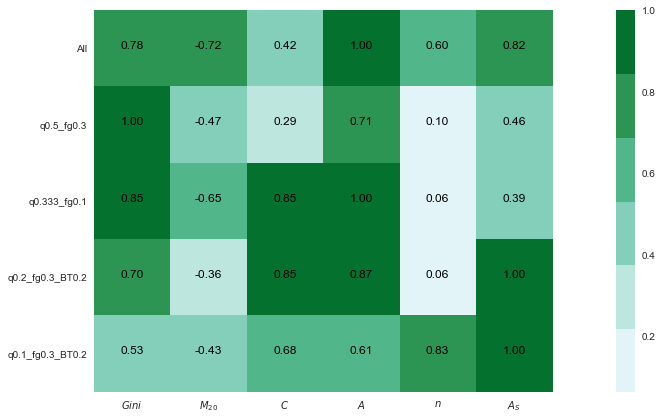

NameError: name 'STOP' is not defined

In [32]:
'''Make a confusion-matrix like graph for the importance of the predictors'''
    
    
matrix = np.array([[0.84745017, -0.77748814,  0.45854377,  1.08586678,  0.65571667,  0.8948428],
                   [3.50,-1.64,1.01,2.49,0.36,1.61],
          [1.86,-1.41,1.85,2.18,0.14,0.84],
          [0.56,-0.29,0.68,0.70,0.05,0.80],
          [0.40,-0.33,0.52,0.46,0.63,0.76]])
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from matplotlib.colors import ListedColormap

print(matrix.shape,matrix[0])
matrix_row_0=matrix[0]/max(matrix[0])
matrix_row_1=matrix[1]/max(matrix[1])
matrix_row_2=matrix[2]/max(matrix[2])
matrix_row_3=matrix[3]/max(matrix[3])
matrix_row_4=matrix[4]/max(matrix[4])

matrix_new=[matrix_row_0,matrix_row_1,matrix_row_2,matrix_row_3,matrix_row_4]

matrix_new=np.array(matrix_new)
print(type(matrix),type(matrix_new), np.shape(matrix_new))


plt.clf()
my_cmap = ListedColormap(sns.color_palette("BuGn").as_hex())


#sns.diverging_palette(10, 220, sep=80, n=7)
sns.set_style('dark')
plt.imshow(abs(matrix_new), cmap=my_cmap)
tick_marks_x = np.arange(np.shape(matrix)[1])
tick_marks_y = np.arange(np.shape(matrix)[0])

target_names_x=[r'$Gini$',r'$M_{20}$',r'$C$',r'$A$',r'$n$',r'$A_S$']
target_names_y=['All','q0.5_fg0.3', 'q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']
plt.xticks(tick_marks_x, target_names_x)#, rotation=45)
plt.yticks(tick_marks_y, target_names_y)
plt.colorbar()


fmt = '.2f' 
thresh = 1.5
    
for i, j in itertools.product(range(matrix_new.shape[0]), range(matrix_new.shape[1])):
    plt.text(j, i, format(matrix_new[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix_new[i, j] > thresh else "black")
plt.tight_layout()
plt.show()
#plt.savefig('../MaNGA_Papers/Paper_I/color_predictors.pdf')
STOP
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

done


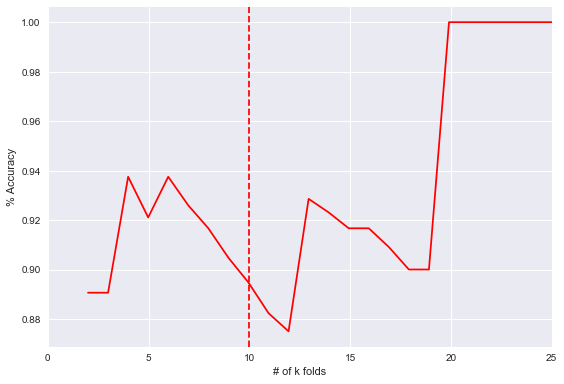

In [4]:
print('done')

plt.clf()
plt.plot(k, avg_dec_0, color='red')

plt.xlabel(r'# of k folds')
plt.ylabel(r'% Accuracy')
plt.axvline(x=10, color='red', ls='--')
plt.xlim([0,25])
plt.tight_layout()
plt.show()

In [5]:
'''
A bootstrap method to determine errors by dropping each galaxy individually
'''


'''
~~~
Now just for the imaging part of it!
~~~
'''



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
add_on='fg1_m13'#,'fg1_m13']#,'fg1_m13']

run=add_on
c_0=[]
c_1=[]
c_2=[]
c_3=[]
c_4=[]
c_5=[]
c_6=[]


for kz in range(len(df)):
    df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end

    df.drop(df.index[kz])
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)



    from sklearn.preprocessing import LabelEncoder

    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.06])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    c_0.append(coef[0][0])
    c_1.append(coef[0][1])
    c_2.append(coef[0][2])
    c_3.append(coef[0][3])
    c_4.append(coef[0][4])
    c_5.append(coef[0][5])
    c_6.append(coef[0][6])
    
'''Now run the full out analysis please'''    
df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

for j in range(len(df)):
    if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


        #I use this part to check if there is any separation at these points in time
        #Or if there are more than two bulges
        #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
        df.set_value(j,'class label',0.0)



from sklearn.preprocessing import LabelEncoder


X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

from sklearn import preprocessing



std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)


n_params=7


y = df['class label'].values


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1


label_dict = {1: 'NonMerger', 2: 'Merger'}
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.94,0.06])
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
dec = sklearn_lda.score(X,y)
prob = sklearn_lda.predict_proba(X)

coef = sklearn_lda.coef_
print(coef)
print(np.mean(c_0),np.std(c_0))
print(np.mean(c_1),np.std(c_1))
print(np.mean(c_2),np.std(c_2))
print(np.mean(c_3),np.std(c_3))
print(np.mean(c_4),np.std(c_4))
print(np.mean(c_5),np.std(c_5))
print(np.mean(c_6),np.std(c_6))




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-06bfcc9bd58f>", line 64, in <module>
    sep='\t'
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 709, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 449, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 818, in __init__
    self._make_engine(self.engine)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", line 1049, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/beckynevin/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py", lin

FileNotFoundError: File b'LDA_img_ratio_fg1_m13_early_late_all_things.txt' does not exist

run fg3_m12
[1. 5. 0. 1. 0.]
[ 1. 10.  0.  1.  0.]
[ 1. 20.  0.  1.  0.]
[ 1. 30.  0.  1.  0.]
[1. 5. 1. 1. 0.]
[ 1. 10.  1.  1.  0.]
[ 1. 20.  1.  1.  0.]
[ 1. 30.  1.  1.  0.]
[1. 5. 2. 1. 0.]
[ 1. 10.  2.  1.  0.]
[ 1. 20.  2.  1.  0.]
[ 1. 30.  2.  1.  0.]
[1. 5. 3. 1. 0.]
[ 1. 10.  3.  1.  0.]
[ 1. 20.  3.  1.  0.]
[1. 5. 4. 1. 0.]
[ 1. 10.  4.  1.  0.]
[ 1. 20.  4.  1.  0.]
[ 1. 30.  4.  1.  0.]
[1. 5. 5. 1. 0.]
[ 1. 10.  5.  1.  0.]
[ 1. 20.  5.  1.  0.]
[ 1. 30.  5.  1.  0.]
[1. 5. 6. 1. 0.]
[ 1. 10.  6.  1.  0.]
[ 1. 20.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.70978658 -0.79113272  4.42303291 ...  0.34526739  2.9482
   0.35841947]
 [ 0.76440784 -0.84553525  4.3461586  ...  0.34911774  2.7168
   0.36333205]
 [ 0.71709391 -2.65401726  4.51544993 ...  0.

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:82: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)



shape X_qda_sklearn ()
0.9947916666666666


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 576x396 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

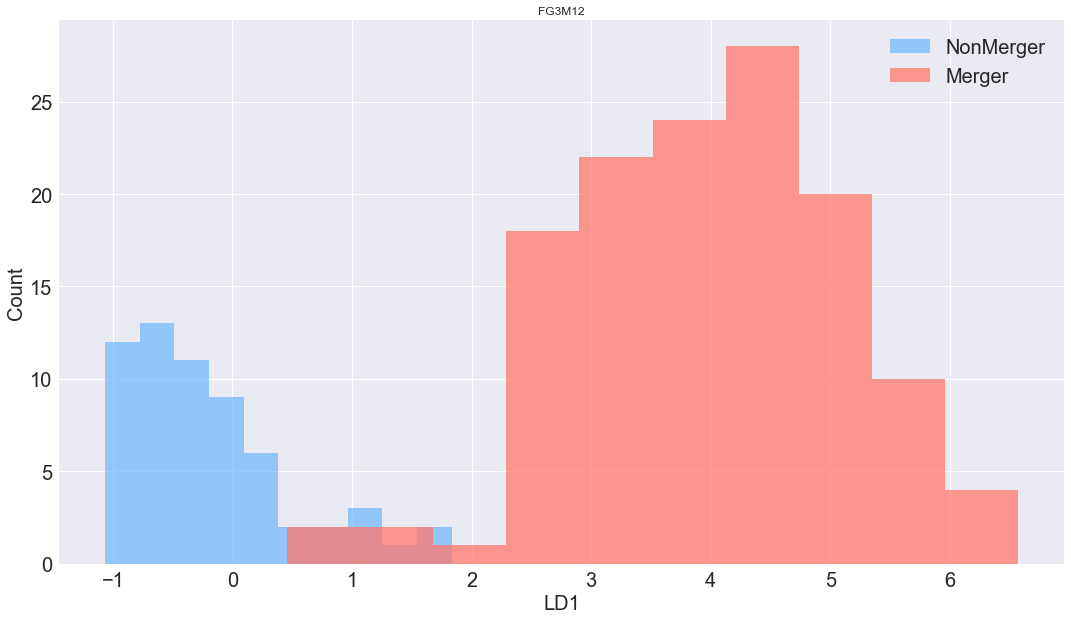

[[ 0.31715482 -2.57240147  4.45759542  6.70784565 -1.12017059  0.26683895
   0.69988222]]
     class label
0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             0
13             0
14             0
15             0
16             1
17             1
18             1
19             1
20             1
21             1
22             1
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
162            0
163            0
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183      

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



[ 1. 10.  5.  1.  0.]
[ 1. 10.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.61020128 -1.84076285  2.72034022 ...  0.03551586  0.8552
   0.07418257]
 [ 0.61313577 -1.86532189  2.79654005 ...  0.12571824  0.8864
   0.16252166]
 [ 0.72319029 -1.57674979  2.82135715 ...  0.23993998  0.5103
   0.47637   ]
 ...
 [ 0.69359342 -1.83051587  2.72034022 ...  0.0593231   0.8355
   0.04984751]
 [ 0.71240611 -1.788465    2.72034022 ...  0.08271237  0.9579
   0.04851613]
 [ 0.72429504 -1.88212437  3.01029996 ...  0.30658355  1.6703
   0.08324348]]
X after norm [[-2.03854239  0.12943664 -1.51599442 ... -1.48483818 -1.21993582
  -0.9141491 ]
 [-1.99062564  0.08372735 -1.41401758 ... -0.7766804  -1.16793862
  -0.53664549]
 [-0.19356923  0.6208176  -1.38080532 ...  0.12004773 -1.794

<Figure size 576x396 with 0 Axes>

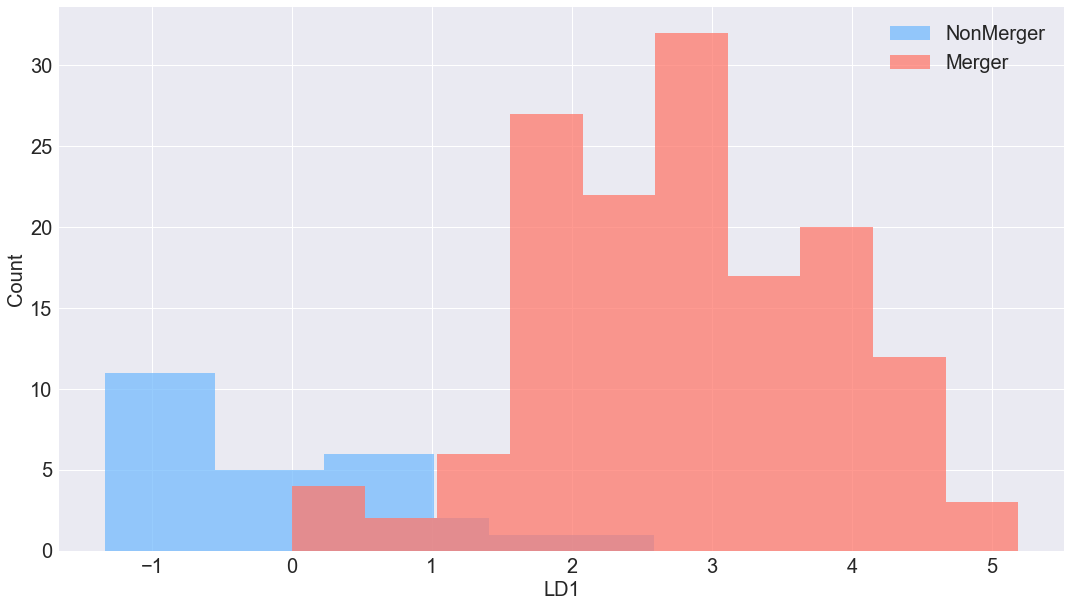

[[-1.02264439 -2.06155472  2.21632597  2.5695055   0.44245812  0.36149426
   1.24281559]]
     class label
0              0
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             1
13             1
14             1
15             1
16             1
17             1
18             1
19             1
20             1
21             1
22             0
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183            0
184            0
185      

In [34]:
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    print('X before norm', X)

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    print('X after norm', X)

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    print('~~~Coefficients and Intercepts~~~')
    print(coef,inter)
    
    
    

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    my_lists_non = []
    separations = {key:[] for key in myr}

    print(df[['class label']])
    #STOP
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])

    #print(mean(my_lists[180]))
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        myr_plot=np.linspace(myr_non[i]/100,myr_non[i]/100,len(my_lists_none[myr_non[i]]))
        #np.full((3, 5), 7) that last value is your fill
        plt.scatter(myr_plot,my_lists_none[myr_non[i]], color=tableau20[i])
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



In [3]:
'''
Now trying to do the same thing for different viewing angles
'''
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m15','fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.94,0.04])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    #print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    if run=='fg3_m15':
        plt.tilte('FG3M15')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m15':
        myr=[320,340,360,400,420]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
        
    myr_non=[0,1,2,3,4,5,6]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    myr_lists_none = {key:[] for key in myr_non}
    
    
    my_lists_non = []
    separations = {key:[] for key in myr}

    
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Viewpoint']].values[i][0]].append(X_lda_sklearn[i][0])
            myr_lists_none[df[['Viewpoint']].values[i][0]].append(df[['Myr']].values[i][0]/100)
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        print('viewpoint', i, 'color', tableau20[i])
        print('xs',myr_lists_none[i])
        print('ys',my_lists_none[i])
        plt.scatter(myr_lists_none[i],my_lists_none[i], color=tableau20[i], label='Viewpoint '+str(i))
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.legend()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_view_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')




run fg3_m15


FileNotFoundError: File b'LDA_img_ratio_fg3_m15_early_late_all_things.txt' does not exist

In [39]:
'''This section is for testing if the LDA is sensitive to priors'''



prior_1=np.linspace(0,1,101)
print('prior_1', prior_1)
#this is fraction nonmerg

acc_12=[]
fp_12=[]
fn_12=[]


for i in range(len(prior_1)):
   
    add_on='fg3_m12'#'fg3_m12'
    print('run', add_on)


    run=add_on
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if add_on=='fg3_m15':
            if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
                df.set_value(j,'class label',0.0)
        else:
            if add_on=='fg3_m1_10':
                
                if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]

                    df.set_value(j,'class label',0.0)
            else:
                if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                #was < 40

                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                    df.set_value(j,'class label',0.0)
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=6


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    '''sklearn_lda = LDA(priors=[prior_1[i],1-prior_1[i]])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_'''
    
    '''New method'''
    from sklearn.model_selection import KFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X)
   
    
    
    
    confusion_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        sklearn_lda = LDA(priors=[prior_1[i],1-prior_1[i]], store_covariance=True)#store_covariance=False
    
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        
        confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
        
        
    print(prior_1[i],1-prior_1[i])
    print(np.mean(confusion_master, axis=0))
    new_conf=np.mean(confusion_master, axis=0)
    #print(new_conf[0][0], new_conf[1][1])
    accuracy=(new_conf[0][0]+new_conf[1][1])/(np.sum(new_conf))
    
    
   
    #print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    acc_12.append(accuracy)
    fp_12.append(new_conf[0][1]/(new_conf[0][0]+new_conf[1][0]+new_conf[0][1]+new_conf[1][1]))
    fn_12.append(new_conf[1][0]/(new_conf[0][0]+new_conf[1][0]+new_conf[0][1]+new_conf[1][1]))


prior_1 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
run fg3_m12
0.0 1.0
[[ 0.   0. ]
 [ 6.1 13.1]]
run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:401: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:406: RuntimeWarning: divide by zero encountered in log
  np.log(self.priors_))


0.01 0.99
[[ 5.   0.1]
 [ 1.1 13. ]]
run fg3_m12
0.02 0.98
[[ 5.4  0.2]
 [ 0.7 12.9]]
run fg3_m12
0.03 0.97
[[ 5.6  0.2]
 [ 0.5 12.9]]
run fg3_m12
0.04 0.96
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.05 0.95
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.06 0.94
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.07 0.9299999999999999
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.08 0.92
[[ 5.8  0.3]
 [ 0.3 12.8]]
run fg3_m12
0.09 0.91
[[ 5.8  0.4]
 [ 0.3 12.7]]
run fg3_m12
0.1 0.9
[[ 5.8  0.4]
 [ 0.3 12.7]]
run fg3_m12
0.11 0.89
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.12 0.88
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.13 0.87
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.14 0.86
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.15 0.85
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.16 0.84
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.17 0.83
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.18 0.8200000000000001
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.19 0.81
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.2 0.8
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_

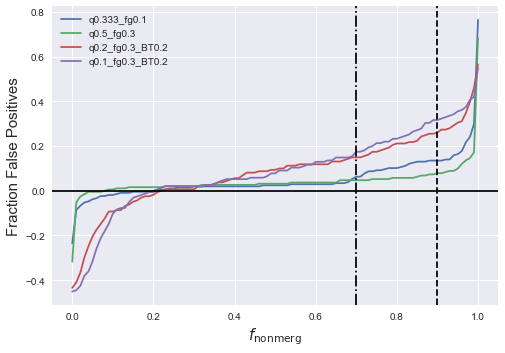

In [80]:
plt.clf()
plt.plot(prior_1, np.array(fp_13)-np.array(fn_13),  label='q0.333_fg0.1')
plt.plot(prior_1, np.array(fp_12)-np.array(fn_12),  label='q0.5_fg0.3')
plt.plot(prior_1, np.array(fp_15)-np.array(fn_15),  label='q0.2_fg0.3_BT0.2')
plt.plot(prior_1, np.array(fp_10)-np.array(fn_10),  label='q0.1_fg0.3_BT0.2')
plt.xlabel(r'$f_{\mathrm{nonmerg}}$', size=15)
plt.ylabel('Fraction False Positives', size=15)
plt.axvline(x=0.9, ls='--', color='black')
plt.axvline(x=0.7, ls='-.', color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.show()

In [51]:



plt.clf()
plt.plot(prior_1, acc_13,  label='q0.333_fg0.1')
plt.plot(prior_1, acc_12,  label='q0.5_fg0.3')
plt.plot(prior_1, acc_15,  label='q0.2_fg0.3_BT0.2')
plt.plot(prior_1, acc_10,  label='q0.1_fg0.3_BT0.2')
plt.xlabel(r'$f_{\mathrm{nonmerg}}$', size=15)
plt.ylabel('LDA Accuracy', size=15)
plt.axvline(x=0.9, ls='--', color='black')
plt.axvline(x=0.7, ls='-.', color='black')
plt.legend()
plt.xlim([0,1])
#plt.show()
plt.savefig('../MaNGA_Papers/Paper_I/insensitive_to_priors.pdf')



In [88]:
import math
import numpy as np

fg3_m12_eig=[4.3,-0.7,1.4,3.2,-2.2,2.5,1.8]
fg1_m13_eig=[3.0,-1.7,3.9,3.7,-2.7,-0.2,1.1]
fg3_m15_eig=[14.0, -1.0, 24.4, 9.7, -14.0, -6.0, 6.2]

list_names=[fg3_m12_eig,fg1_m13_eig,fg3_m15_eig]
act_names=['q0.5_fg0.3','q0.333_fg0.1', 'q0.2_fg0.3']
for x in range(len(list_names)):
    for y in range(len(list_names)):
        try:
            exp=math.degrees(math.acos(np.dot(list_names[x],list_names[y])/(np.linalg.norm(list_names[x])*np.linalg.norm(list_names[y]))))
        except ValueError:
            print('Domain error', act_names[x], 'vs', act_names[y])
        if exp <90:
            expnow=exp
        else:
            expnow=abs(180-exp)
        print(act_names[x], 'vs', act_names[y], expnow)


q0.5_fg0.3 vs q0.5_fg0.3 0.0
q0.5_fg0.3 vs q0.333_fg0.1 35.00562395799082
q0.5_fg0.3 vs q0.2_fg0.3 48.159754311711765
q0.333_fg0.1 vs q0.5_fg0.3 35.00562395799082
q0.333_fg0.1 vs q0.333_fg0.1 0.0
q0.333_fg0.1 vs q0.2_fg0.3 22.585970746417956
q0.2_fg0.3 vs q0.5_fg0.3 48.159754311711765
q0.2_fg0.3 vs q0.333_fg0.1 22.585970746417956
Domain error q0.2_fg0.3 vs q0.2_fg0.3
q0.2_fg0.3 vs q0.2_fg0.3 22.585970746417956


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.8,0.2])
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
dec = sklearn_lda.score(X,y)
print(X_lda_sklearn)
coef = sklearn_lda.coef_
inter = sklearn_lda.intercept_
print(dec)
print(coef)
print(inter)

#plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

[[-1.24905461]
 [-1.68091976]
 [ 6.11884828]
 [ 5.47198309]
 [ 4.60309771]
 [ 4.87954727]
 [ 4.17413156]
 [ 2.41719754]
 [ 2.97902972]
 [ 3.25976892]
 [ 3.36865114]
 [ 3.5545208 ]
 [ 3.75685733]
 [ 3.84589582]
 [-1.54500051]
 [-1.42974055]
 [ 4.22642622]
 [ 3.33484153]
 [ 3.81751928]
 [ 3.06943415]
 [ 3.27857911]
 [ 2.3236804 ]
 [ 4.03394623]
 [ 4.21368238]
 [ 3.49088418]
 [ 3.57496975]
 [ 3.95586172]
 [ 3.37118699]
 [-1.58020943]
 [-0.89848461]
 [ 4.14912498]
 [ 4.82284989]
 [ 3.81352123]
 [ 3.91659071]
 [ 3.85951445]
 [ 2.34015896]
 [ 2.63493089]
 [ 3.07472385]
 [ 3.9168378 ]
 [ 3.29674971]
 [ 3.6968283 ]
 [ 2.42648068]
 [-1.70062429]
 [-1.08279531]
 [ 4.64566041]
 [ 2.53592523]
 [ 3.69385845]
 [ 4.23612936]
 [ 4.19900727]
 [ 2.78530766]
 [ 4.36577064]
 [ 4.67723876]
 [ 4.62902936]
 [ 2.9028692 ]
 [ 3.9237619 ]
 [ 2.82556094]
 [-0.6409273 ]
 [-0.12130954]
 [ 5.06461006]
 [ 4.92248169]
 [ 2.81614121]
 [ 5.44111939]
 [ 3.62730409]
 [ 4.05635161]
 [ 3.83527829]
 [ 4.03960082]
 [ 3.73802

In [49]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=0 * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [21]:
'''
This is to test how sensitive or insensitive the process is to the priors
Priors vary:
Lotz2011 f_merg = 15%

'''

'''
~~~
Now just for the imaging part of it!
~~~
'''



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12']#,'fg1_m13']#,'fg1_m13']
priors_list=[[0.94,0.06],[0.85,0.15],[0.06,0.94],[0.999,0.001],[0.001,0.999]]

for k in range(len(prior_list)):
    for i in range(len(list_runs)):
   
        add_on=list_runs[i]
        print('run', add_on)


        run=list_runs[i]
        df = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
        df.dropna(how="all", inplace=True) # to drop the empty line at file-end

        for j in range(len(df)):
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0.0)



        from sklearn.preprocessing import LabelEncoder


        X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

        from sklearn import preprocessing

        #print('X before norm', X)

        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)
        #print('X after norm', X)

        n_params=7


        y = df['class label'].values


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=priors_list[k])
        X_lda_sklearn = sklearn_lda.fit_transform(X, y)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        class_label = sklearn_lda.classes_

        print('~~~Coefficients and Intercepts~~~')
        print(coef,inter)
        
        
        

        print('priors', priors_list[k])
        print('mean accuracy',dec)#mean accuracy on the given test data and labels.

        print(inter)
        '''Make a histogram'''
        from scipy import stats
        import seaborn as sns
        plt.clf()
        fig = plt.figure(figsize=(18,10))
        ax = fig.add_subplot(111)
        X_lda_1=[]
        X_lda_2=[]
        for j in range(len(X_lda_sklearn)):
            if y[j] ==1:
                X_lda_1.append(X_lda_sklearn[j][0])
            else:
                X_lda_2.append(X_lda_sklearn[j][0])
        input_hist=X_lda_sklearn

        ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
        ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

        '''for label,col in zip(range(1,4),  ('blue', 'red')):
            input_hist=X_lda_sklearn
            input_all=X_lda_sklearn
            ax.hist(input_hist,
                           color=col,
                           label='class %s' %label_dict[label],
                           alpha=0.5,)#bins=bins,
            xt = plt.xticks()[0]  
            xmin, xmax = -0.1,0.7#min(xt), max(xt)  
            lnspc = np.linspace(xmin, xmax, len(input_hist))

            # lets try the normal distribution first
            m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
            pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
            #ax.plot(lnspc, pdf_g,  color=col) # plot it



        ylims = ax.get_ylim()

        # plot annotation
        leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
        leg.get_frame().set_alpha(0.5)
        ax.set_ylim([0, max(ylims)+2])'''

        ax.set_xlabel('LD1', size=20)
        #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

        # hide axis ticks
        ax.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

        # remove axis spines
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)    

        ax.set_ylabel('Count', size=20)


        plt.legend(loc="upper right", fontsize=20)
        #fig.tight_layout() 
        #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
        #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
        #frame1 = plt.gca()
        if run=='fg1_m_13':
            plt.title('FG1M13')
        if run=='fg3_m12':
            plt.title('FG3M12')
        plt.show()

    

NameError: name 'prior_list' is not defined